In [2]:
#Análise Estatística de Vendas em uma Loja

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Gerar um dataset fictício de vendas
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D']
local_vendas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Gerar dados aleatórios
dados_vendas = []
for _ in range(1000):
    produto = random.choice(produtos)
    local = random.choice(local_vendas)
    quantidade = random.randint(1, 20)  # Vendas de 1 a 20 unidades
    preco = random.randint(10, 200)  # Preço entre 10 e 200 reais
    data = datetime.now() - timedelta(days=random.randint(0, 365))
    dados_vendas.append([produto, preco, quantidade, data.strftime('%Y-%m-%d'), local])

# Criar DataFrame
df_vendas = pd.DataFrame(dados_vendas, columns=['Produto', 'Preço', 'Quantidade', 'Data', 'Local'])

# Exibir as primeiras linhas
print(df_vendas.head())

     Produto  Preço  Quantidade        Data   Local
0  Produto A     63          13  2024-04-17  Loja 4
1  Produto D    175          13  2024-05-18  Loja 1
2  Produto C    158          12  2025-02-12  Loja 2
3  Produto D    164          14  2024-10-02  Loja 1
4  Produto A    167           1  2024-05-03  Loja 2


In [3]:
# Calcular o valor total da venda
df_vendas['Valor Total'] = df_vendas['Preço'] * df_vendas['Quantidade']

# Estatísticas descritivas
estatisticas = df_vendas[['Preço', 'Quantidade', 'Valor Total']].describe()
print("Estatísticas Descritivas:")
print(estatisticas)

Estatísticas Descritivas:
            Preço   Quantidade  Valor Total
count  1000.00000  1000.000000  1000.000000
mean    101.75800    10.469000  1052.462000
std      54.23531     5.761965   862.932985
min      10.00000     1.000000    10.000000
25%      53.75000     5.000000   350.000000
50%     103.00000    10.000000   805.500000
75%     147.00000    15.000000  1530.000000
max     200.00000    20.000000  4000.000000


In [6]:
#Análise Inferencial: Intervalo de Confiança

import scipy.stats as stats

# Média e erro padrão da amostra
media_vendas = df_vendas['Valor Total'].mean()
erro_padrao = df_vendas['Valor Total'].std() / np.sqrt(len(df_vendas))

# Intervalo de confiança de 95%
intervalo_conf = stats.norm.interval(0.95, loc=media_vendas, scale=erro_padrao)

print(f"\nMédia de Vendas: {media_vendas:.2f}")
print(f"Erro padrão: {erro_padrao:.2f}")
print(f"Intervalo de Confiança de 95% para a média de vendas: {intervalo_conf}")


Média de Vendas: 1052.46
Erro padrão: 27.29
Intervalo de Confiança de 95% para a média de vendas: (998.9778422939912, 1105.9461577060088)


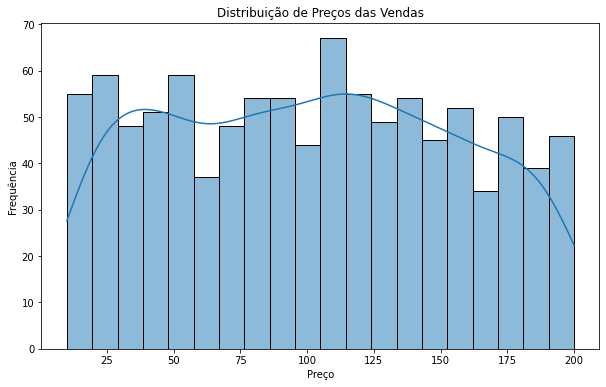

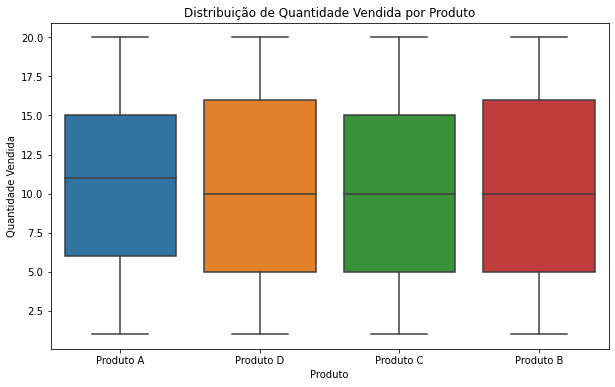

In [7]:
#Visualização e Padrões

import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de preços
plt.figure(figsize=(10,6))
sns.histplot(df_vendas['Preço'], bins=20, kde=True)
plt.title('Distribuição de Preços das Vendas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Boxplot de Quantidade Vendida
plt.figure(figsize=(10,6))
sns.boxplot(x='Produto', y='Quantidade', data=df_vendas)
plt.title('Distribuição de Quantidade Vendida por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()